# Description

This tutorial shows how to extract and visualize all features splits for EDA purposes ignoring the feature selection step.

# Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from pandas import Series

from autowoe import AutoWoE

from matplotlib import pyplot as plt

# Prepare Dataset

In [2]:
df = pd.read_csv("./data/train_demo.csv")

In [3]:
df.head()

,Unnamed: 0,number_0,number_1,datetime_0,number_2,number_3,number_4,datetime_1,number_5,number_6,...,number_756,number_757,number_758,number_759,number_760,number_761,number_762,number_763,number_764,line_id
0,0,1.0,42.0,2016-05-20,0.0,0.0,38.0,2016-05-18,0.0,0.0,...,0.80,0.6,0.92,0.000000,0.0,3.259135,1.0,NaN,NaN,2
1,1,1.0,62.0,2016-06-02,0.0,0.0,29.0,2016-06-01,0.0,0.0,...,-1.00,-1.0,1.00,0.000000,0.0,6.906755,1.0,NaN,NaN,3
2,2,1.0,62.0,2016-09-07,0.0,0.0,48.0,2016-09-07,0.0,0.0,...,1.00,1.0,0.33,0.000000,0.0,5.109978,1.0,NaN,NaN,6
3,3,1.0,57.0,2016-06-02,0.0,0.0,30.0,2016-06-01,0.0,0.0,...,0.75,0.5,0.82,1.942212,1.0,5.806138,1.0,NaN,NaN,8
4,4,1.0,37.0,2016-02-27,0.0,0.0,48.0,2016-02-27,1.0,0.0,...,-1.00,-1.0,1.00,1.539603,1.0,1.543687,1.0,NaN,NaN,9


In [4]:
df.shape

(7000, 775)

In [5]:
TARGET_NAME = "target"

In [6]:
num_features = [col for col in df.columns if col.startswith('number')][:10]
cat_features = [col for col in df.columns if col.startswith('string')][:5]

df = df[num_features + cat_features + [TARGET_NAME]]

In [7]:
df

,number_0,number_1,number_2,number_3,number_4,number_5,number_6,number_7,number_8,number_9,string_0,string_1,string_2,string_3,target
0,1.0,42.0,0.0,0.0,38.0,0.0,0.0,0.0,38.0,25733.0,NaN,living in city in apart,N,NaN,0.0
1,1.0,62.0,0.0,0.0,29.0,0.0,0.0,0.0,29.0,16997.0,NaN,other,N,NaN,1.0
2,1.0,62.0,0.0,0.0,48.0,0.0,0.0,0.0,48.0,-2.0,NaN,living in city in apart,N,NaN,0.0
3,1.0,57.0,0.0,0.0,30.0,0.0,0.0,0.0,30.0,118331.0,NaN,other,N,NaN,0.0
4,1.0,37.0,0.0,0.0,48.0,1.0,0.0,0.0,48.0,68767.0,NaN,living in city in apart,N,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,1.0,62.0,0.0,0.0,61.0,0.0,0.0,0.0,61.0,46667.0,NaN,other,N,NaN,0.0
6996,1.0,62.0,0.0,0.0,74.0,0.0,0.0,0.0,74.0,NaN,NaN,other,N,NaN,0.0
6997,1.0,38.0,0.0,0.0,74.0,0.0,0.0,0.0,74.0,164000.0,NaN,other,N,NaN,0.0
6998,1.0,56.0,0.0,0.0,54.0,0.0,0.0,0.0,54.0,81011.0,NaN,other,N,NaN,0.0


In [8]:
train_df, test_df = train_test_split(df, stratify=df[TARGET_NAME], test_size=0.4, random_state=42, shuffle=True)

In [9]:
train_df[TARGET_NAME].mean(), test_df[TARGET_NAME].mean()

(0.010714285714285714, 0.010714285714285714)

# Train model

In [10]:


autowoe = AutoWoE(
    task="BIN",
    n_jobs=1,
    verbose=0,
    # turn off initial importance selection - this step force all features to pass into the binning stage
    imp_th=-1

)

autowoe.fit(
    train=train_df, 
    target_name=TARGET_NAME
)

[LightGBM] [Info] Number of positive: 36, number of negative: 3324
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 480
[LightGBM] [Info] Number of data points in the train set: 3360, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.010714 -> initscore=-4.525405
[LightGBM] [Info] Start training from score -4.525405


In [11]:
test_pred = autowoe.predict_proba(test_df)

In [12]:
print("Test ROC_AUC  = {:.3f}".format(roc_auc_score(test_df[TARGET_NAME], test_pred)))

Test ROC_AUC  = 0.619


# Visualize Splits

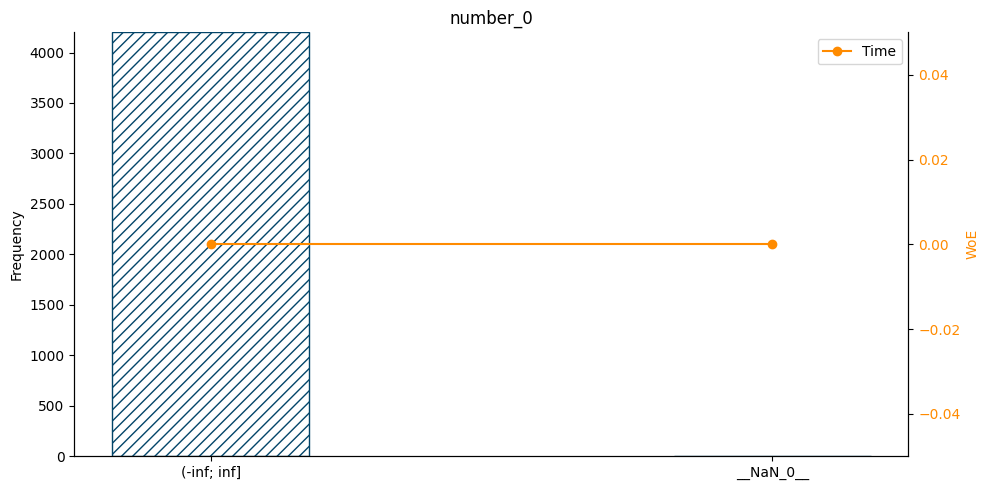

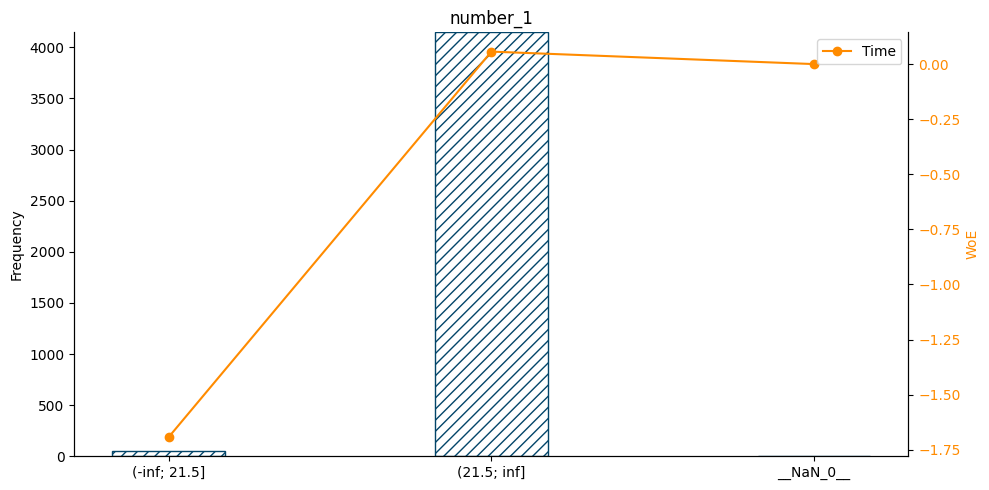

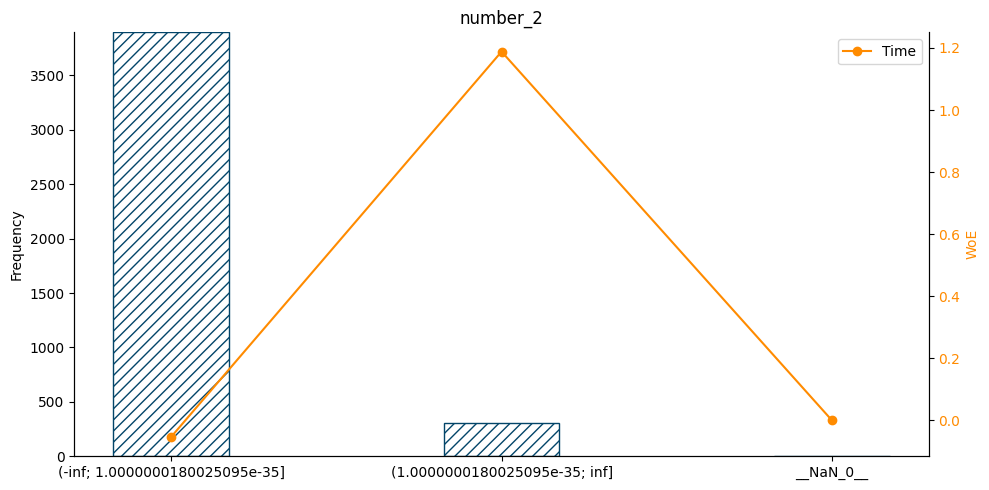

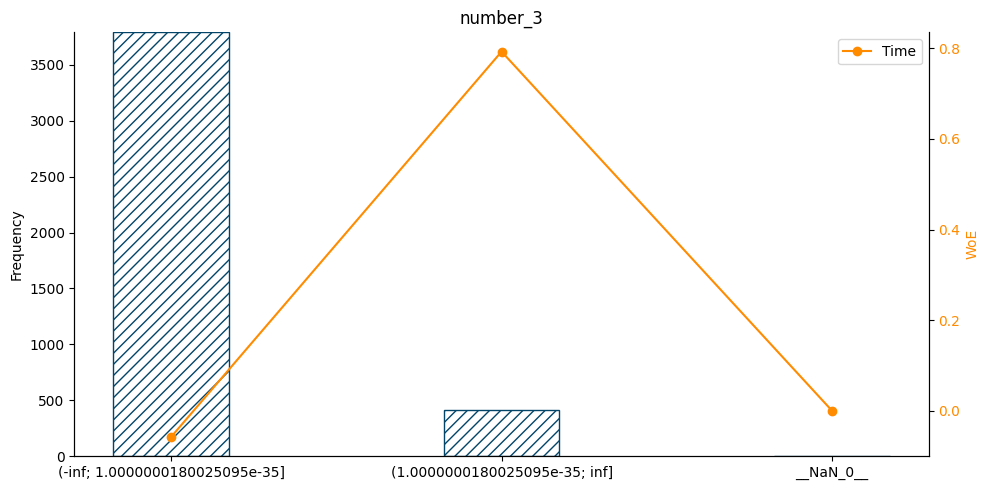

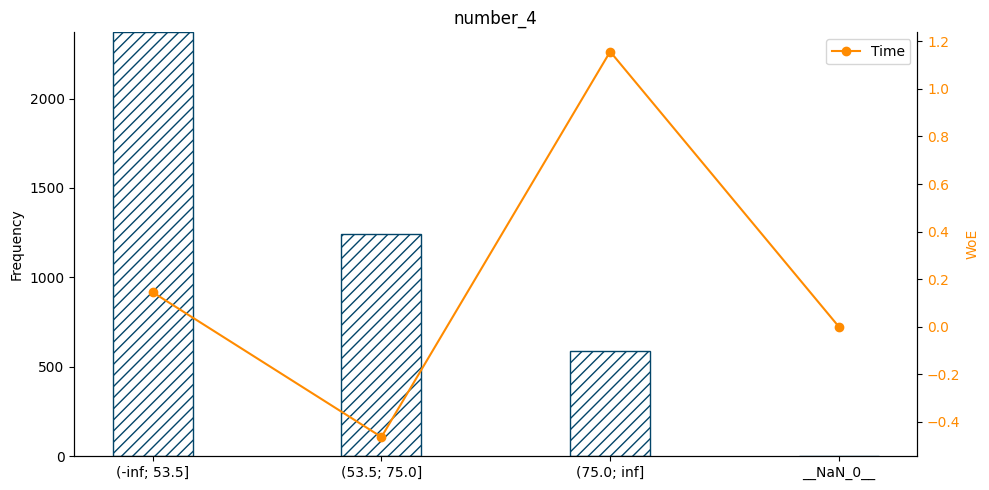

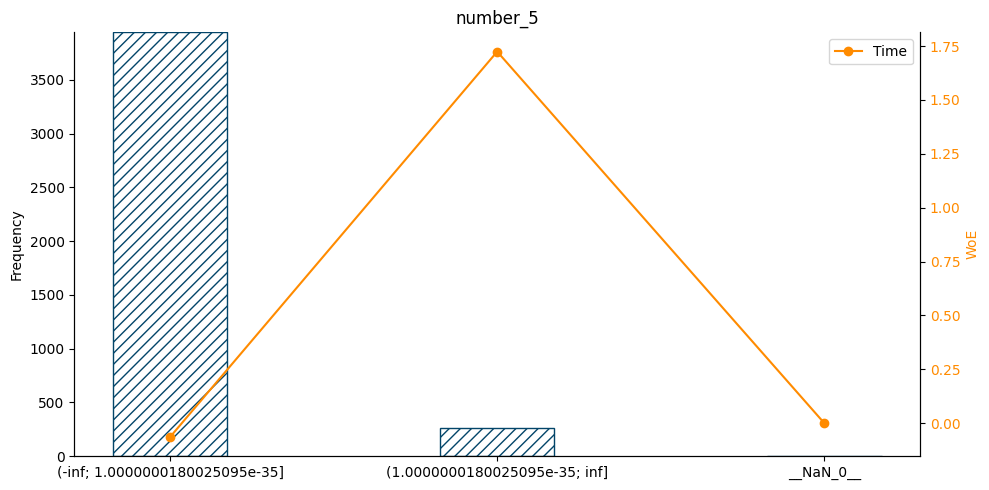

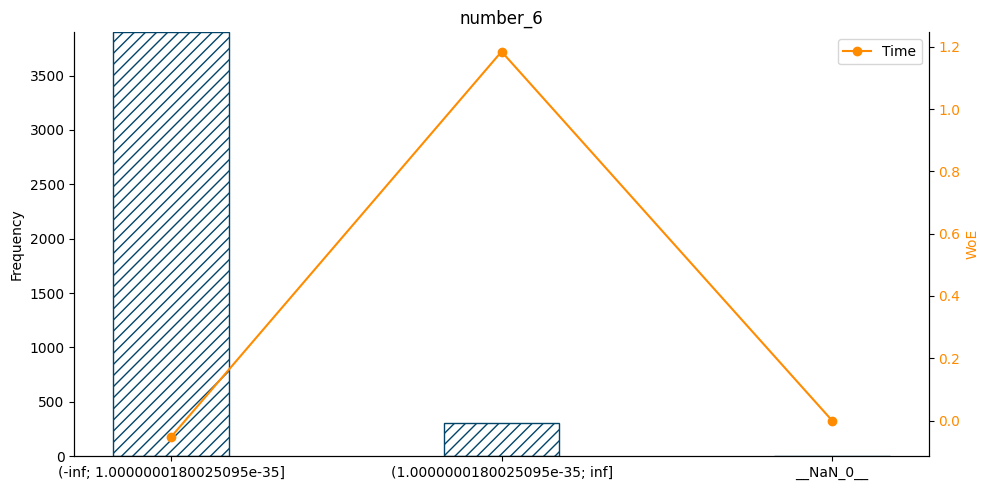

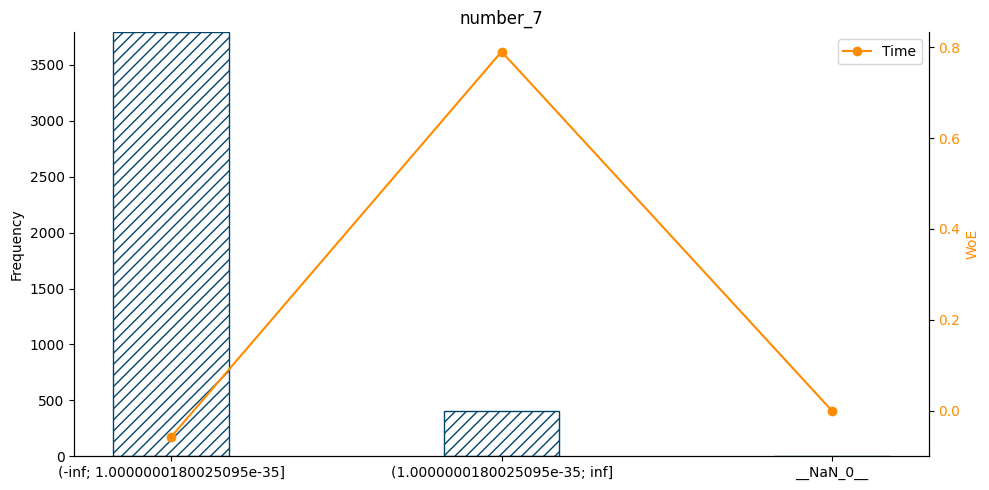

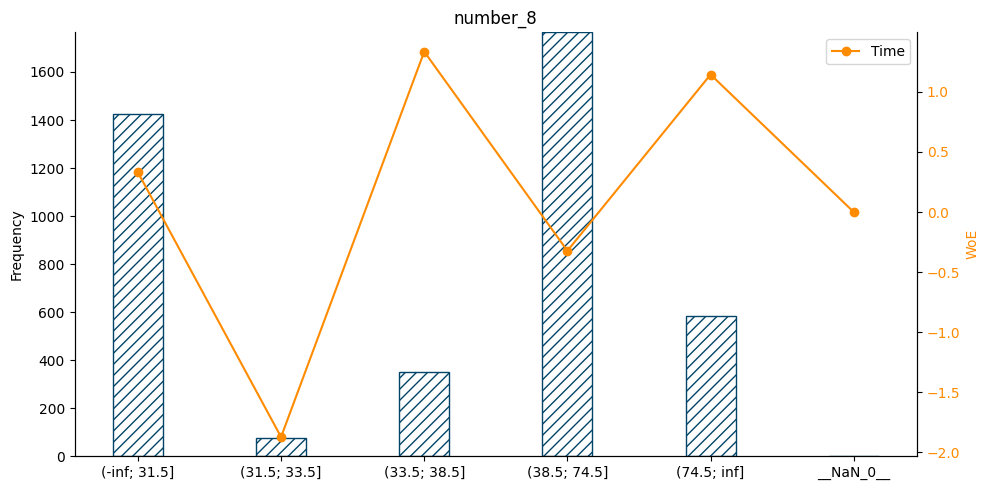

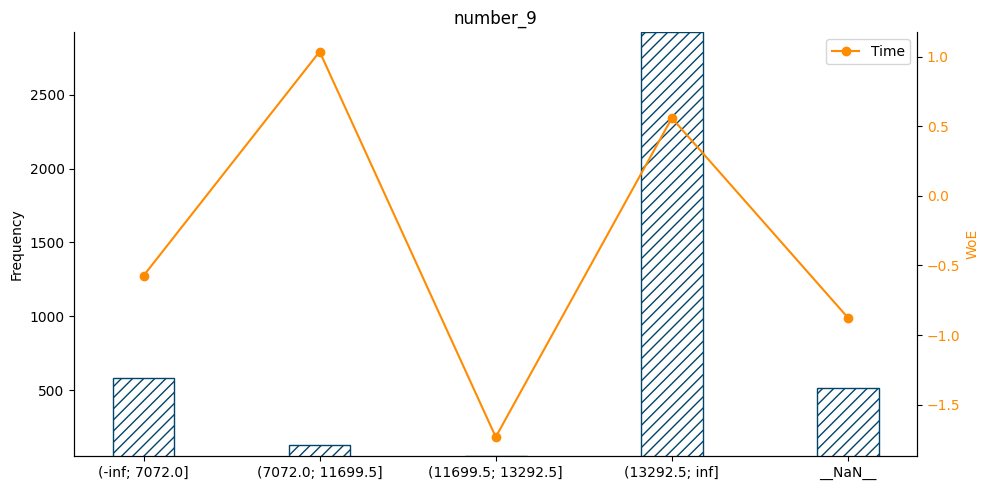

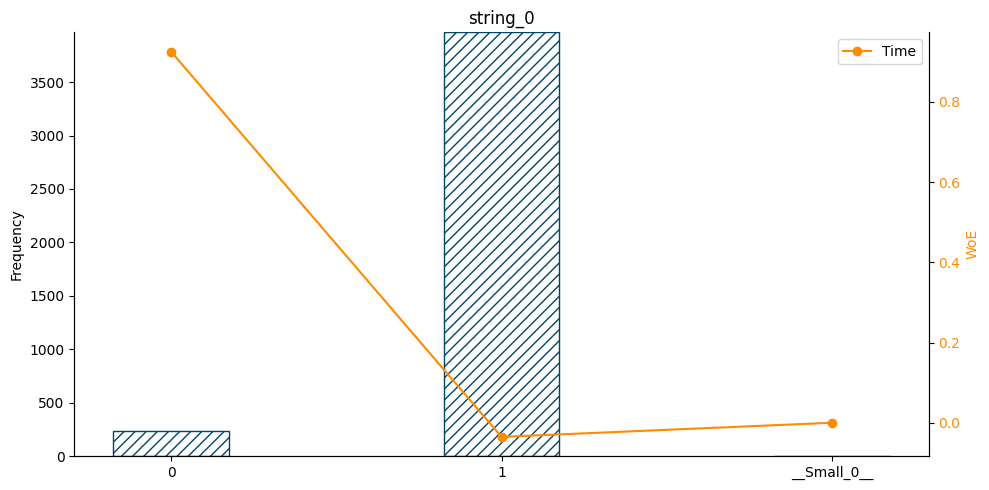

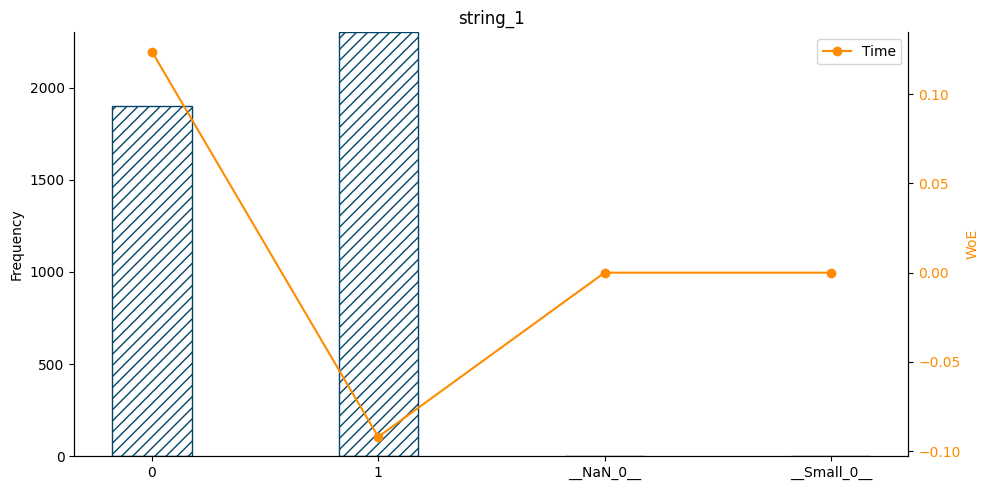

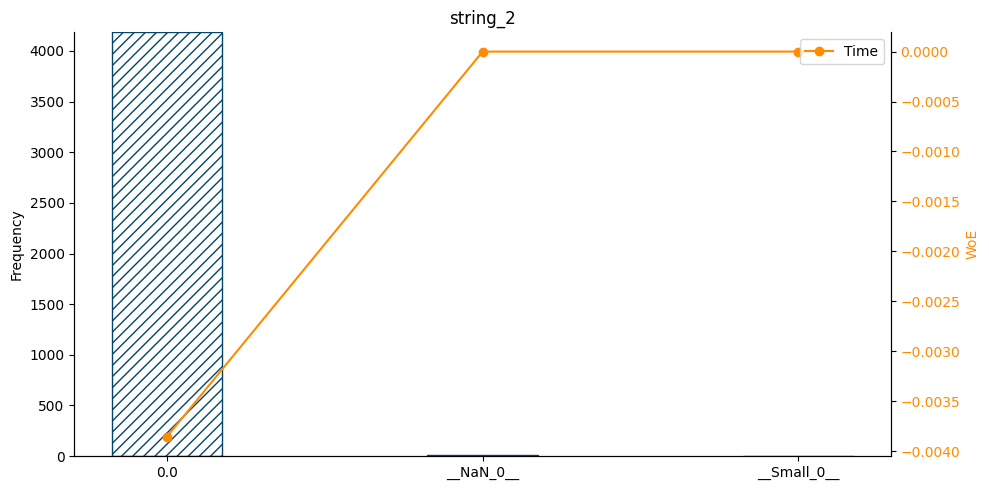

In [13]:


def plot_bar(woe_val):
    
    labels = woe_val['bin'].tolist()
    woe = woe_val['WoE'].tolist()
    freq = woe_val['count'].tolist()

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=[10, 5])
    rects = ax.bar(x, freq, width, label='Score', hatch="///",edgecolor="#034569", color='none')

    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
    color = '#FF8B00'
    ax2.plot(x, woe, color=color, label='Time', marker='o',)
    ax2.set_ylabel('WoE', color=color) 
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.grid(False)
    diff = max(woe) - min(woe)
    ax2.set_ylim(np.min(woe) - 0.05 * diff, np.max(woe) + 0.05 * diff)

    ax.set_ylabel('Frequency')
    ax.set_title(woe_val.columns[0])
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(np.min(freq) - 0.002, np.max(freq) + 0.002)
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)

    plt.legend()
    plt.tight_layout()
    plt.show()
    

enc = autowoe.test_encoding(train_df, list(autowoe.woe_dict.keys()), bins=True)
for col in enc.columns:
    
    grp = enc.groupby(col).size()
    woe = autowoe.woe_dict[col]
    
    woe_val = Series(woe.cod_dict).reset_index()
    woe_val.columns = [col, 'WoE']
    woe_val['count'] = woe_val[col].map(grp).fillna(0).values.astype(int)
    if woe.f_type == 'cat':
        woe_val['bin'] = woe_val[col]
    else:
        split = list(woe.split.astype(np.float32))
        mapper = {n: '({0}; {1}]'.format(x, y)  for (n, (x, y)) in 
                  enumerate(zip(['-inf'] + split, split + ['inf']))}
        woe_val['bin'] = woe_val[col].map(mapper)
        woe_val['bin'] = np.where(woe_val['bin'].isnull().values, woe_val[col], woe_val['bin'])
        
    plot_bar(woe_val)

